In [17]:
import os
import json
from matplotlib import pyplot as plt

In [132]:
# Search for the available json files in the results folder:
rootdir = "../results/datapoints"

plot_info_files = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".json"):
            plot_info_files.append(os.path.join(subdir, file))
    break

# Reading the files and storing the info in a dict: 
all_plot_info = {}
# print("List of run configurations to plot: ")
for file in plot_info_files:
    file_name = file.split("/")[-1].removesuffix('.json')
    # print(" -", file_name)
    with open(file) as json_content:
        all_plot_info[file_name] = json.load(json_content)

print("Inner keys:")
print(" - iterations")
print(" - rel_duality_gap")

Inner keys:
 - iterations
 - rel_duality_gap


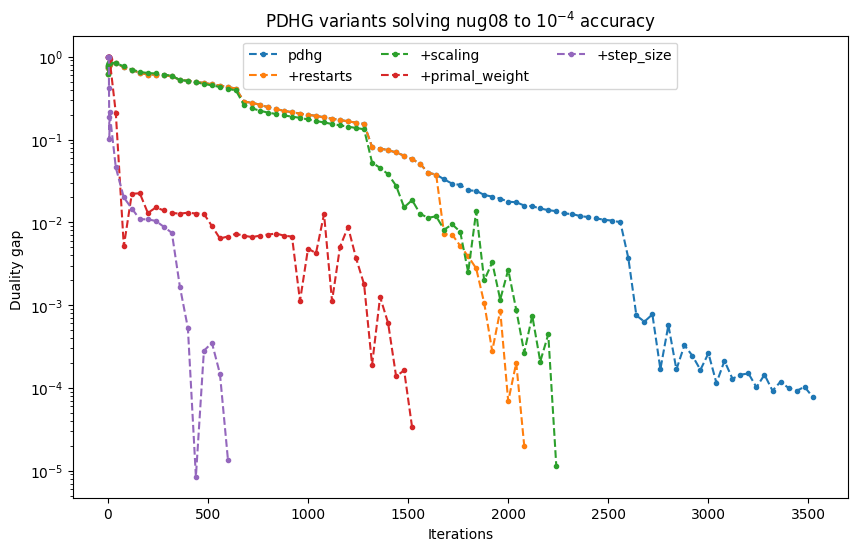

In [100]:
# Plotting the baseline convergence results for accuracy=1e-4
solve_pdhg = all_plot_info["nug08-3rd_baseline_pdhg_1e-4"]
solve_pdhg_restarts = all_plot_info["nug08-3rd_baseline_+restarts_1e-4"]
solve_pdhg_scaling = all_plot_info["nug08-3rd_baseline_+scaling_1e-4"]
solve_pdhg_primal_weight = all_plot_info["nug08-3rd_baseline_+primal_weight_1e-4"]
solve_pdhg_step_size = all_plot_info["nug08-3rd_baseline_+step_size_1e-4"]

plt.figure(figsize=(10, 6))
plt.plot(solve_pdhg["iterations"][1:], solve_pdhg["rel_duality_gap"][1:], ".--", label="pdhg")
plt.plot(solve_pdhg_restarts["iterations"][1:], solve_pdhg_restarts["rel_duality_gap"][1:], ".--", label="+restarts")
plt.plot(solve_pdhg_scaling["iterations"][1:], solve_pdhg_scaling["rel_duality_gap"][1:], ".--", label="+scaling")
plt.plot(solve_pdhg_primal_weight["iterations"][1:], solve_pdhg_primal_weight["rel_duality_gap"][1:], ".--", label="+primal_weight")
plt.plot(solve_pdhg_step_size["iterations"][1:], solve_pdhg_step_size["rel_duality_gap"][1:], ".--", label="+step_size")

plt.xlabel("Iterations") 
plt.ylabel("Duality gap ")
plt.yscale('log')
plt.title("PDHG variants solving nug08 to $10^{-4}$ accuracy")
plt.legend(loc="upper center", ncol=3);

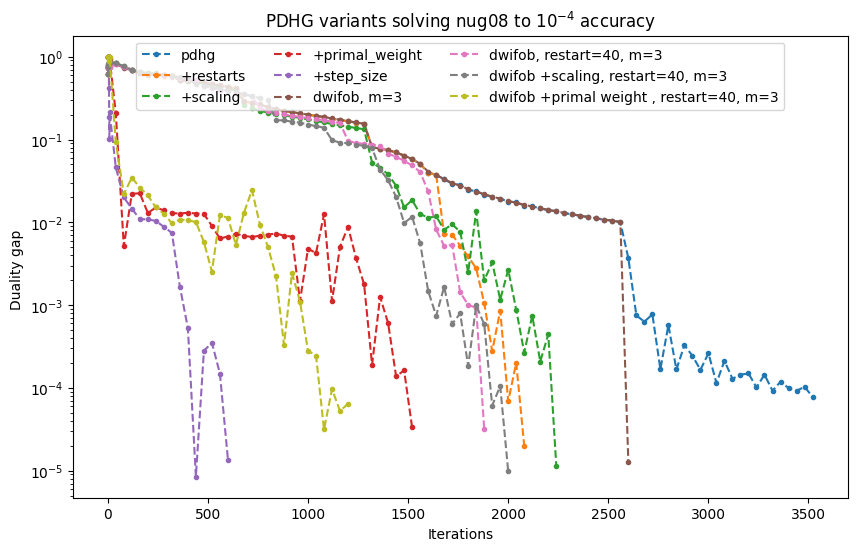

In [133]:
# Adding in the DWIFOB variants as well:
plt.figure(figsize=(10, 6))
plt.plot(solve_pdhg["iterations"][1:], solve_pdhg["rel_duality_gap"][1:], ".--", label="pdhg")
plt.plot(solve_pdhg_restarts["iterations"][1:], solve_pdhg_restarts["rel_duality_gap"][1:], ".--", label="+restarts")
plt.plot(solve_pdhg_scaling["iterations"][1:], solve_pdhg_scaling["rel_duality_gap"][1:], ".--", label="+scaling")
plt.plot(solve_pdhg_primal_weight["iterations"][1:], solve_pdhg_primal_weight["rel_duality_gap"][1:], ".--", label="+primal_weight")
plt.plot(solve_pdhg_step_size["iterations"][1:], solve_pdhg_step_size["rel_duality_gap"][1:], ".--", label="+step_size")

# We only select the best performing DWIFOB variant for each improvement, to reduce clutter: 
# Often this is the one with m=3 or m=4, which indicates that this is a reasonable choice of m for this problem size.
# Vanilla dwifob: 
solve_dwifob_m3 = all_plot_info["nug08-3rd_dwifob_1e-4_m=3"]
plt.plot(solve_dwifob_m3["iterations"][1:], solve_dwifob_m3["rel_duality_gap"][1:], ".--", label="dwifob, m=3")

# The best (? fastest in seconds) restart version of dwifob: constant restarts every 40 iterations, and m=3.
solve_dwifob_restart40_m3 = all_plot_info["nug08-3rd_dwifob_+restarts_restart=40_1e-4_m=3"]
plt.plot(solve_dwifob_restart40_m3["iterations"][1:], solve_dwifob_restart40_m3["rel_duality_gap"][1:], ".--", label="dwifob, restart=40, m=3")

# The fastest scaled version of dwifob: r=40, m=3 still.
solve_dwifob_scaled_r40_m3 = all_plot_info["nug08-3rd_dwifob_+scaling_restart=40_1e-4_m=3"]
plt.plot(solve_dwifob_scaled_r40_m3["iterations"][1:], solve_dwifob_scaled_r40_m3["rel_duality_gap"][1:], ".--", label="dwifob +scaling, restart=40, m=3")

# One of the fastest versions of dwifob+ primal weight update: r=40, m=3
solve_dwifob_primal_update_r40_m3 = all_plot_info["nug08-3rd_dwifob_+primal_weight_restart=40_1e-4_m=3"]
plt.plot(solve_dwifob_primal_update_r40_m3["iterations"][1:], solve_dwifob_primal_update_r40_m3["rel_duality_gap"][1:], ".--", label="dwifob +primal weight , restart=40, m=3")

plt.xlabel("Iterations") 
plt.ylabel("Duality gap ")
plt.yscale('log')
plt.title("PDHG variants solving nug08 to $10^{-4}$ accuracy")
plt.legend(loc="upper center", ncol=3);

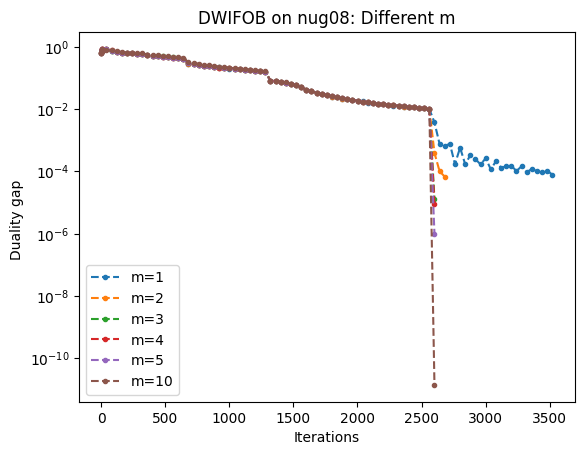

In [108]:
# Plotting an example, different values of m for fast dwifob on the nug08-3rd dataset: 
nug08_m1 = all_plot_info["nug08-3rd_dwifob_1e-4_m=1"]
nug08_m2 = all_plot_info["nug08-3rd_dwifob_1e-4_m=2"]
nug08_m3 = all_plot_info["nug08-3rd_dwifob_1e-4_m=3"]
nug08_m4 = all_plot_info["nug08-3rd_dwifob_1e-4_m=4"]
nug08_m5 = all_plot_info["nug08-3rd_dwifob_1e-4_m=5"]
nug08_m10 = all_plot_info["nug08-3rd_dwifob_1e-4_m=10"]

plt.plot(nug08_m1["iterations"][1:], nug08_m1["rel_duality_gap"][1:], ".--", label="m=1")
plt.plot(nug08_m2["iterations"][1:], nug08_m2["rel_duality_gap"][1:], ".--", label="m=2")
plt.plot(nug08_m3["iterations"][1:], nug08_m3["rel_duality_gap"][1:], ".--", label="m=3")
plt.plot(nug08_m4["iterations"][1:], nug08_m4["rel_duality_gap"][1:], ".--", label="m=4")
plt.plot(nug08_m5["iterations"][1:], nug08_m5["rel_duality_gap"][1:], ".--", label="m=5")
plt.plot(nug08_m10["iterations"][1:], nug08_m10["rel_duality_gap"][1:], ".--", label="m=10")

plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("DWIFOB on nug08: Different m")
plt.legend();

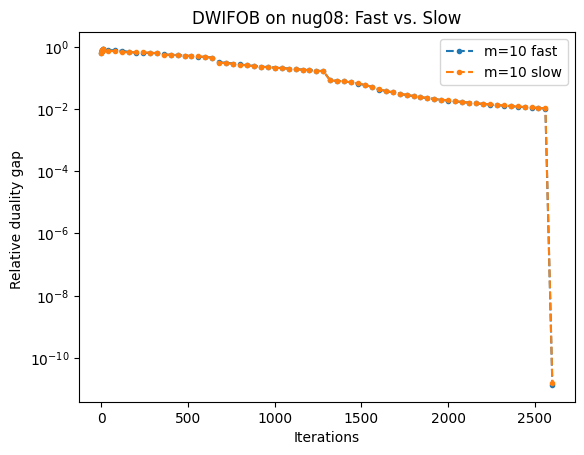

In [121]:
# Comparing slow and fast implementations of DWIFOB: 
dwifob_m3_fast = all_plot_info["nug08-3rd_dwifob_1e-4_m=3"]
dwifob_m10_fast = all_plot_info["nug08-3rd_dwifob_1e-4_m=10"]

dwifob_m3_slow = all_plot_info["nug08-3rd_dwifob_slow_1e-4_m=3"]
dwifob_m10_slow = all_plot_info["nug08-3rd_dwifob_slow_1e-4_m=10"]

# When plotting both, it is difficult to see the difference. 
# plt.plot(dwifob_m3_fast["iterations"][1:], dwifob_m3_fast["rel_duality_gap"][1:], ".--", label="m=3 fast")
# plt.plot(dwifob_m3_slow["iterations"][1:], dwifob_m3_slow["rel_duality_gap"][1:], ".--", label="m=3 slow")

plt.plot(dwifob_m10_fast["iterations"][1:], dwifob_m10_fast["rel_duality_gap"][1:], ".--", label="m=10 fast")
plt.plot(dwifob_m10_slow["iterations"][1:], dwifob_m10_slow["rel_duality_gap"][1:], ".--", label="m=10 slow")

# Plotting the difference instead: 
# diff_m3 = []
# for fast_gap, slow_gap in zip(dwifob_m3_fast["rel_duality_gap"], dwifob_m3_slow["rel_duality_gap"]):
#     diff_m3.append(fast_gap - slow_gap)
# plt.plot(dwifob_m3_fast["iterations"][1:], diff_m3[1:], ".", label="m=3 (fast - slow)")

# diff_m10 = []
# for fast_gap, slow_gap in zip(dwifob_m10_fast["rel_duality_gap"], dwifob_m10_slow["rel_duality_gap"]):
#     diff_m10.append(fast_gap - slow_gap)
# plt.plot(dwifob_m3_fast["iterations"][1:], diff_m10[1:], ".", label="m=10 (fast - slow)")


plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("DWIFOB on nug08: Fast vs. Slow")
plt.legend();

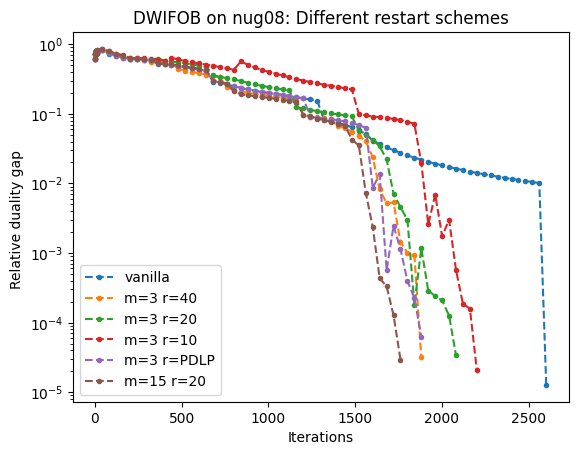

In [129]:
# Comparing different restart schemes: 
dwifob_no_restart_m3 = all_plot_info["nug08-3rd_dwifob_1e-4_m=3"]
dwifob_restart40_m3 = all_plot_info["nug08-3rd_dwifob_+restarts_restart=40_1e-4_m=3"]
dwifob_restart20_m3 = all_plot_info["nug08-3rd_dwifob_+restarts_restart=20_1e-4_m=3"]
dwifob_restart10_m3 = all_plot_info["nug08-3rd_dwifob_+restarts_restart=10_1e-4_m=3"]
dwifob_restartPDLP_m3 = all_plot_info["nug08-3rd_dwifob_+restarts_restart=PDLP_1e-4_m=3"]

plt.plot(dwifob_no_restart_m3["iterations"][1:], dwifob_no_restart_m3["rel_duality_gap"][1:], ".--", label="vanilla")
plt.plot(dwifob_restart40_m3["iterations"][1:], dwifob_restart40_m3["rel_duality_gap"][1:], ".--", label="m=3 r=40")
plt.plot(dwifob_restart20_m3["iterations"][1:], dwifob_restart20_m3["rel_duality_gap"][1:], ".--", label="m=3 r=20")
plt.plot(dwifob_restart10_m3["iterations"][1:], dwifob_restart10_m3["rel_duality_gap"][1:], ".--", label="m=3 r=10")
plt.plot(dwifob_restartPDLP_m3["iterations"][1:], dwifob_restartPDLP_m3["rel_duality_gap"][1:], ".--", label="m=3 r=PDLP")

# This one did very well for some reason, but was significantly slower in seconds:
dwifob_restart20_m15 = all_plot_info["nug08-3rd_dwifob_+restarts_restart=20_1e-4_m=15"]
plt.plot(dwifob_restart20_m15["iterations"][1:], dwifob_restart20_m15["rel_duality_gap"][1:], ".--", label="m=15 r=20")

plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("DWIFOB on nug08: Different restart schemes")
plt.legend();